<a href="https://colab.research.google.com/github/LucasLucena001/Teste01/blob/main/Previsao_AcoesB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
%pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
pd.options.mode.chained_assignment = None

%pip install tensorflow

In [ ]:
acao = "PETR4.SA"

inicio = "2015-12-31"
final = "2024-03-23"

dados_acao = yf.download(acao, inicio, final)

dados_acao

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,6.570000,7.030000,6.550000,6.870000,2.267931,45962100
2016-01-05,6.920000,7.000000,6.620000,6.680000,2.205208,29446700
2016-01-06,6.530000,6.540000,6.400000,6.400000,2.112774,67507200
2016-01-07,6.190000,6.430000,6.080000,6.260000,2.066558,57387900
2016-01-08,6.380000,6.450000,6.130000,6.270000,2.069858,52100300
...,...,...,...,...,...,...
2024-03-18,36.410000,36.720001,35.500000,36.340000,32.923672,35326100
2024-03-19,36.389999,36.849998,35.560001,36.070000,32.679054,48540800
2024-03-20,36.230000,36.740002,35.810001,36.700001,33.249828,39017900


In [ ]:
cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)

cotacao

array([[ 6.86999989],
       [ 6.67999983],
       [ 6.4000001 ],
       ...,
       [36.70000076],
       [35.70000076],
       [36.04999924]])

In [ ]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)

tamanho_dados_treinamento

1637

In [ ]:
escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))


dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1

array([[0.0834375 ],
       [0.0775    ],
       [0.06875001],
       ...,
       [1.015625  ],
       [0.984375  ],
       [0.99531245]])

In [ ]:
dados_para_treinamento = dados_entre_0_e_1[0:tamanho_dados_treinamento, :]

treinamento_x = []

treinamento_y = []

for i in range(60, len(dados_para_treinamento)):

    treinamento_x.append(dados_para_treinamento[i-60:i, 0])

    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 60:

        print(treinamento_x)
        print(treinamento_y)

[array([0.0834375 , 0.0775    , 0.06875001, 0.06437501, 0.0646875 ,
       0.05906251, 0.04156251, 0.0334375 , 0.04656251, 0.03031251,
       0.01875001, 0.014375  , 0.0071875 , 0.00937501, 0.0065625 ,
       0.        , 0.01156251, 0.0125    , 0.02000001, 0.01625   ,
       0.00312501, 0.0090625 , 0.01656251, 0.010625  , 0.0034375 ,
       0.00093751, 0.0078125 , 0.01156251, 0.00750001, 0.015     ,
       0.01218751, 0.00812501, 0.02625   , 0.02250001, 0.0209375 ,
       0.0215625 , 0.0209375 , 0.029375  , 0.0346875 , 0.04531251,
       0.07406251, 0.094375  , 0.0990625 , 0.1021875 , 0.10625   ,
       0.1171875 , 0.12156251, 0.10000001, 0.07531251, 0.0946875 ,
       0.12187501, 0.1225    , 0.12062502, 0.12218749, 0.11187501,
       0.1128125 , 0.13249999, 0.13406249, 0.13249999, 0.12843752])]
[0.12999999135732676]


In [ ]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []


for i in range(60, len(dados_para_treinamento)):

    #60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)



[array([0.0834375 , 0.0775    , 0.06875001, 0.06437501, 0.0646875 ,
       0.05906251, 0.04156251, 0.0334375 , 0.04656251, 0.03031251,
       0.01875001, 0.014375  , 0.0071875 , 0.00937501, 0.0065625 ,
       0.        , 0.01156251, 0.0125    , 0.02000001, 0.01625   ,
       0.00312501, 0.0090625 , 0.01656251, 0.010625  , 0.0034375 ,
       0.00093751, 0.0078125 , 0.01156251, 0.00750001, 0.015     ,
       0.01218751, 0.00812501, 0.02625   , 0.02250001, 0.0209375 ,
       0.0215625 , 0.0209375 , 0.029375  , 0.0346875 , 0.04531251,
       0.07406251, 0.094375  , 0.0990625 , 0.1021875 , 0.10625   ,
       0.1171875 , 0.12156251, 0.10000001, 0.07531251, 0.0946875 ,
       0.12187501, 0.1225    , 0.12062502, 0.12218749, 0.11187501,
       0.1128125 , 0.13249999, 0.13406249, 0.13249999, 0.12843752])]
[0.12999999135732676]
[array([0.0834375 , 0.0775    , 0.06875001, 0.06437501, 0.0646875 ,
       0.05906251, 0.04156251, 0.0334375 , 0.04656251, 0.03031251,
       0.01875001, 0.014375  , 0.007

In [ ]:
treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

print(treinamento_x)

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x)

[[0.0834375  0.0775     0.06875001 ... 0.13406249 0.13249999 0.12843752]
 [0.0775     0.06875001 0.06437501 ... 0.13249999 0.12843752 0.12999999]
 [0.06875001 0.06437501 0.0646875  ... 0.12843752 0.12999999 0.104375  ]
 ...
 [0.81406248 0.87093747 0.86906243 ... 0.78531248 0.82812501 0.83781249]
 [0.87093747 0.86906243 0.90187502 ... 0.82812501 0.83781249 0.84843749]
 [0.86906243 0.90187502 0.87374998 ... 0.83781249 0.84843749 0.87781251]]
[[[0.0834375 ]
  [0.0775    ]
  [0.06875001]
  ...
  [0.13406249]
  [0.13249999]
  [0.12843752]]

 [[0.0775    ]
  [0.06875001]
  [0.06437501]
  ...
  [0.13249999]
  [0.12843752]
  [0.12999999]]

 [[0.06875001]
  [0.06437501]
  [0.0646875 ]
  ...
  [0.12843752]
  [0.12999999]
  [0.104375  ]]

 ...

 [[0.81406248]
  [0.87093747]
  [0.86906243]
  ...
  [0.78531248]
  [0.82812501]
  [0.83781249]]

 [[0.87093747]
  [0.86906243]
  [0.90187502]
  ...
  [0.82812501]
  [0.83781249]
  [0.84843749]]

 [[0.86906243]
  [0.90187502]
  [0.87374998]
  ...
  [0.8378

In [ ]:
modelo = Sequential()


modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

treinamento_x.shape[1]

60

In [ ]:
modelo.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=10)

Epoch 1/10
1577/1577 [==============================] - 23s 12ms/step - loss: 0.0038
Epoch 2/10
1577/1577 [==============================] - 13s 8ms/step - loss: 0.0012
Epoch 3/10
1577/1577 [==============================] - 13s 8ms/step - loss: 9.8789e-04
Epoch 4/10
1577/1577 [==============================] - 13s 8ms/step - loss: 7.7140e-04
Epoch 5/10
1577/1577 [==============================] - 13s 8ms/step - loss: 7.8048e-04
Epoch 6/10
1577/1577 [==============================] - 14s 9ms/step - loss: 7.2481e-04
Epoch 7/10
1577/1577 [==============================] - 13s 8ms/step - loss: 6.4667e-04
Epoch 8/10
1577/1577 [==============================] - 13s 8ms/step - loss: 7.0677e-04
Epoch 9/10
1577/1577 [==============================] - 13s 8ms/step - loss: 6.6480e-04
Epoch 10/10
1577/1577 [==============================] - 13s 8ms/step - loss: 6.6985e-04


In [ ]:
dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :]

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])


In [ ]:
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [ ]:
predicoes = modelo.predict(teste_x)


predicoes = escalador.inverse_transform(predicoes)

predicoes

13/13 [==============================] - 1s 4ms/step


array([[33.369633],
       [32.649166],
       [33.069786],
       [33.020977],
       [33.39989 ],
       [33.989483],
       [35.705334],
       [35.98652 ],
       [35.92092 ],
       [35.125164],
       [30.752062],
       [31.385374],
       [31.264507],
       [31.910826],
       [32.446354],
       [30.733915],
       [31.736143],
       [32.579796],
       [32.69221 ],
       [32.399998],
       [32.867706],
       [33.6472  ],
       [31.467302],
       [32.67952 ],
       [32.994644],
       [32.511917],
       [32.543045],
       [31.279234],
       [31.15486 ],
       [31.074373],
       [30.728971],
       [29.93744 ],
       [30.469416],
       [30.298332],
       [30.063974],
       [30.584223],
       [30.341879],
       [30.487568],
       [31.24002 ],
       [29.195862],
       [28.841688],
       [29.132406],
       [28.6454  ],
       [28.715628],
       [29.15863 ],
       [31.473345],
       [30.416262],
       [31.910688],
       [32.829327],
       [32.733807],


In [ ]:
rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

0.7495772524577815

In [ ]:
treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close": dados_acao['Close'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})


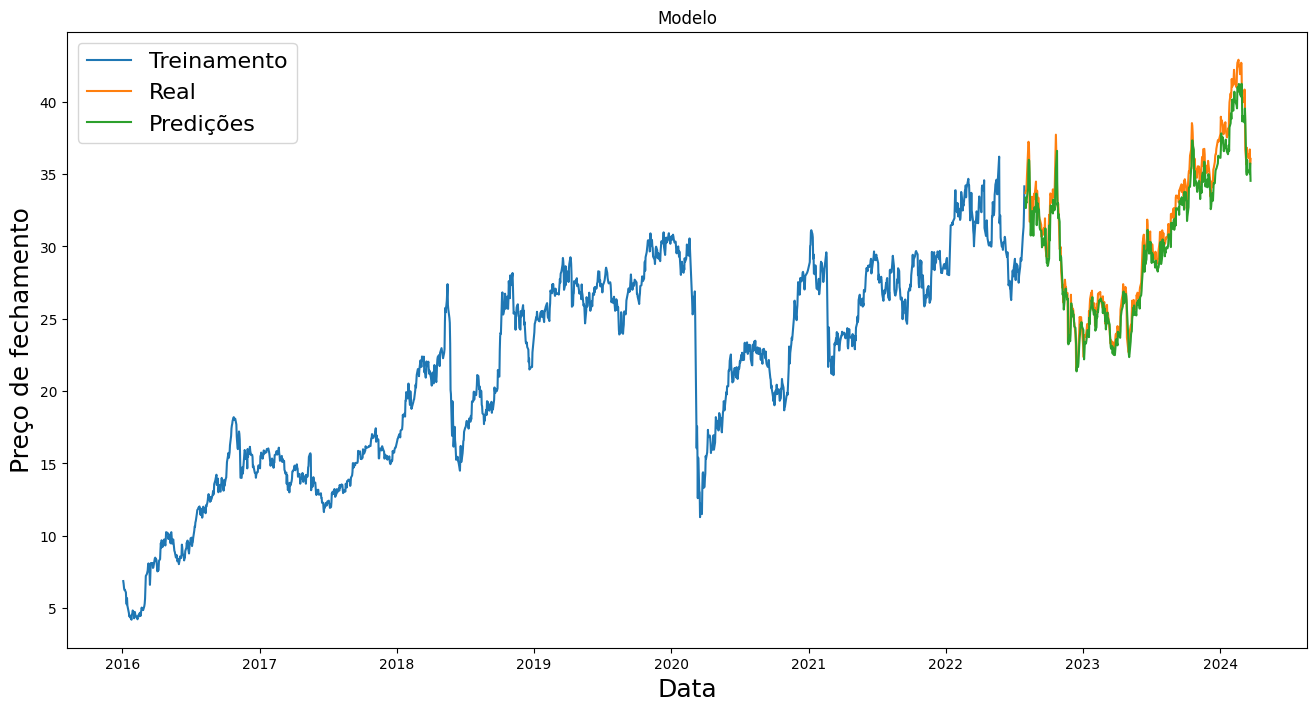

In [ ]:
plt.figure(figsize =(16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [ ]:
df_teste.sort_index()

df_teste

,Close,predicoes
Date,,
2022-08-01,33.680000,33.369633
2022-08-02,33.830002,32.649166
2022-08-03,33.849998,33.069786
2022-08-04,34.209999,33.020977
2022-08-05,34.869999,33.399891
...,...,...
2024-03-18,36.340000,35.242149
2024-03-19,36.070000,35.252182
2024-03-20,36.700001,34.994736


In [ ]:
df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0,
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0,
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2022-08-02,33.830002,32.649166,0.004454,-0.021590,True,False,False,0.004454
2022-08-03,33.849998,33.069786,0.000591,0.012883,True,True,True,0.000591
2022-08-04,34.209999,33.020977,0.010635,-0.001476,True,False,False,0.010635
2022-08-05,34.869999,33.399891,0.019293,0.011475,True,True,True,0.019293
2022-08-08,36.630001,33.989483,0.050473,0.017653,True,True,True,0.050473
...,...,...,...,...,...,...,...,...
2024-03-18,36.340000,35.242149,0.000551,0.002410,True,True,True,0.000551
2024-03-19,36.070000,35.252182,-0.007430,0.000285,False,True,False,0.007430
2024-03-20,36.700001,34.994736,0.017466,-0.007303,True,False,False,0.017466


In [ ]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.016337
True     0.019252
Name: variacao_percentual_acao_abs, dtype: float64
1.1783835671029281
0.5036674816625917
0.15876898980507465


In [ ]:
data_hoje = datetime.now()



if data_hoje.hour > 18:

    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)

else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)

ticker = yf.Ticker("PETR4.SA")
cotacoes = ticker.history(start=inicial, end=final)
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)

print('fim')

1/1 [==============================] - 0s 21ms/step
[[35.565735]]
